In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("/content/financial_loan.csv", encoding='latin-1')

In [5]:
data.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,02-11-2021,9/13/2021,4/13/2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,12/14/2021,1/15/2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,01-05-2021,12-12-2021,01-09-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2/25/2021,12-12-2021,03-12-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,12/14/2021,1/15/2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


#Total Loan Applications**

In [6]:
print("total_loan_applications = ", data['id'].count())

total_loan_applications =  38576


# Months-to-day (MTD) Loan Applications

In [7]:
data['issue_date'] = pd.to_datetime(data['issue_date'], format='mixed')
latest_issue_date = data['issue_date'].max()
latest_issue_year = latest_issue_date.year
latest_issue_month = latest_issue_date.month
mtd_data=data[(data['issue_date'].dt.year == latest_issue_year) & (data['issue_date'].dt.month == latest_issue_month)]
mtd_loan_applications = mtd_data['id'].count()
print(f"mtd_loan_applications (for {latest_issue_date.strftime('%B %Y')}):{ mtd_loan_applications}")

mtd_loan_applications (for December 2021):4314


#total Funded Amount


In [8]:
total_funded_amount = data['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount / 1000000
print(f"total_funded_amount (in millions): {total_funded_amount_millions:.2f}" ,)

total_funded_amount (in millions): 435.76


#Month-to-date [mtd] total funded amount

In [9]:
data['issue_date'] = pd.to_datetime(data['issue_date'], format='mixed')
latest_issue_date = data['issue_date'].max()
latest_issue_year = latest_issue_date.year
latest_issue_month = latest_issue_date.month
mtd_data=data[(data['issue_date'].dt.year == latest_issue_year) & (data['issue_date'].dt.month == latest_issue_month)]
mtd_funded_amount = mtd_data['loan_amount'].sum()
mtd_funded_amount_millions = mtd_funded_amount / 1000000
print(f"mtd_funded_amount (in millions): {mtd_funded_amount_millions:.2f}")


mtd_funded_amount (in millions): 53.98


# Total Amount Recived

In [10]:
total_amount_received = data['total_payment'].sum()
total_amount_received_million= total_amount_received/100000
print(f"total_amount_received (in millions): {total_amount_received_million:.2f}")

total_amount_received (in millions): 4730.71


#Months-to-date [MTD] Total Amount Recived

In [11]:
data['issue_date'] = pd.to_datetime(data['issue_date'], format='mixed')
latest_issue_date = data['issue_date'].max()
latest_issue_year = latest_issue_date.year
latest_issue_month = latest_issue_date.month
mtd_data=data[(data['issue_date'].dt.year == latest_issue_year) & (data['issue_date'].dt.month == latest_issue_month)]
mtd_amount_received = mtd_data['total_payment'].sum()
mtd_amount_received_millions = mtd_amount_received/100000
print(f"mtd_amount_received (in millions): {mtd_amount_received_millions:.2f}")

mtd_amount_received (in millions): 580.74


#Avg Interest Rate

In [12]:
avg_interest_rate = data['int_rate'].mean()*100
print(f"avg_interest_rate: {avg_interest_rate:.2f}" ,"%")

avg_interest_rate: 12.05 %


#Avg Dept-to-Income Ratio (DTI)

In [15]:
avg_dti = data['dti'].mean()*100
print(f"avg_dti: {avg_dti:.2f}%")

avg_dti: 13.33%


#Good loan
1.Good loan application

2.percentage of good loan application

3.Good loan funded Amount

4.Good loan recieved Amount

In [18]:
good_loan = data[data['loan_status'] .isin(['Fully Paid', 'Current'])]
total_loan_applications = data['id'].count()
good_loan_applications = good_loan['id'].count()
good_loan_funded_amount = good_loan['loan_amount'].sum()
good_loan_recieved_amount = good_loan['total_payment'].sum()

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
good_loan_recieved_amount_millions = good_loan_recieved_amount / 1000000

print(f"Good loan applications: {good_loan_applications}")
print(f"Percentage of good loan percentage: {good_loan_percentage:.2f}%")
print(f"Good loan funded amount (in millions): {good_loan_funded_amount_millions:.2f}")
print(f"Good loan recieved amount (in millions): {good_loan_recieved_amount_millions:.2f}")

Good loan applications: 33243
Percentage of good loan percentage: 86.18%
Good loan funded amount (in millions): 370.22
Good loan recieved amount (in millions): 435.79


# Bad Loan

1.Bad loan application

2.percentage of bad loan application

3.Bad loan funded Amount

4.Bad loan recieved Amount

In [20]:
bad_loan = data[data['loan_status'] .isin(["Charged Off"])]
total_loan_applications = data['id'].count()
bad_loan_applications = bad_loan['id'].count()
bad_loan_funded_amount = bad_loan['loan_amount'].sum()
bad_loan_recieved_amount = bad_loan['total_payment'].sum()

bad_loan_percentage = (bad_loan_applications / total_loan_applications) *100
bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
bad_loan_recieved_amount_millions = bad_loan_recieved_amount / 1000000

print(f"Bad loan applications: {bad_loan_applications}")
print(f"Percentage of bad loan percentage: {bad_loan_percentage:.2f}%")
print(f"Bad loan funded amount (in millions): {bad_loan_funded_amount_millions:.2f}")
print(f"Bad loan recieved amount (in millions): {bad_loan_recieved_amount_millions:.2f}")


Bad loan applications: 5333
Percentage of bad loan percentage: 13.82%
Bad loan funded amount (in millions): 65.53
Bad loan recieved amount (in millions): 37.28


#Monthly Trends by Issue Date for Total Funded Amount

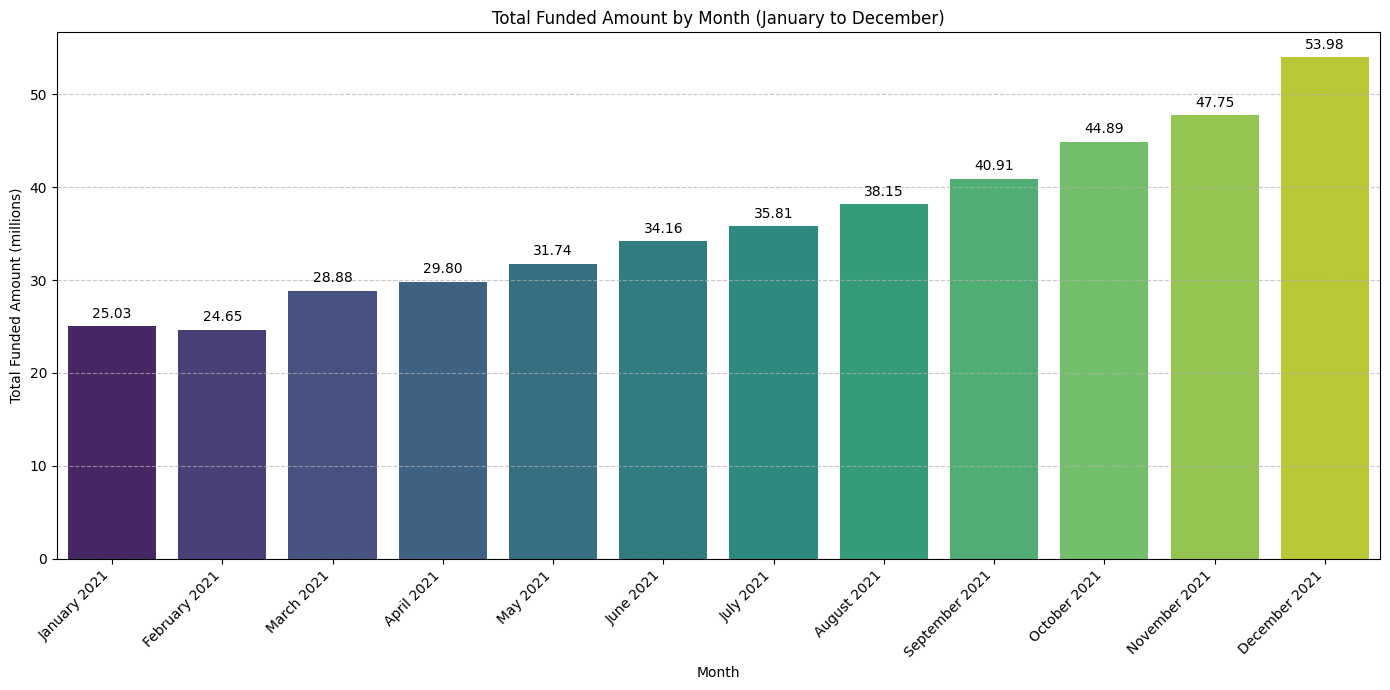

In [30]:
import calendar

# Extract month number for sorting
monlty_funded['month_num'] = monlty_funded['monthly_name'].apply(lambda x: list(calendar.month_name).index(x.split(' ')[0]))

# Sort by month number and then by year if needed (assuming data for one year from current monlty_funded)
monlty_funded_sorted = monlty_funded.sort_values(by=['month_num'])

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='monthly_name', y='total_funded_amount_millions', data=monlty_funded_sorted, palette='viridis')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xlabel('Month')
plt.ylabel('Total Funded Amount (millions)')
plt.title('Total Funded Amount by Month (January to December)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Monthly Trend by Issue Date for Total Amount Received

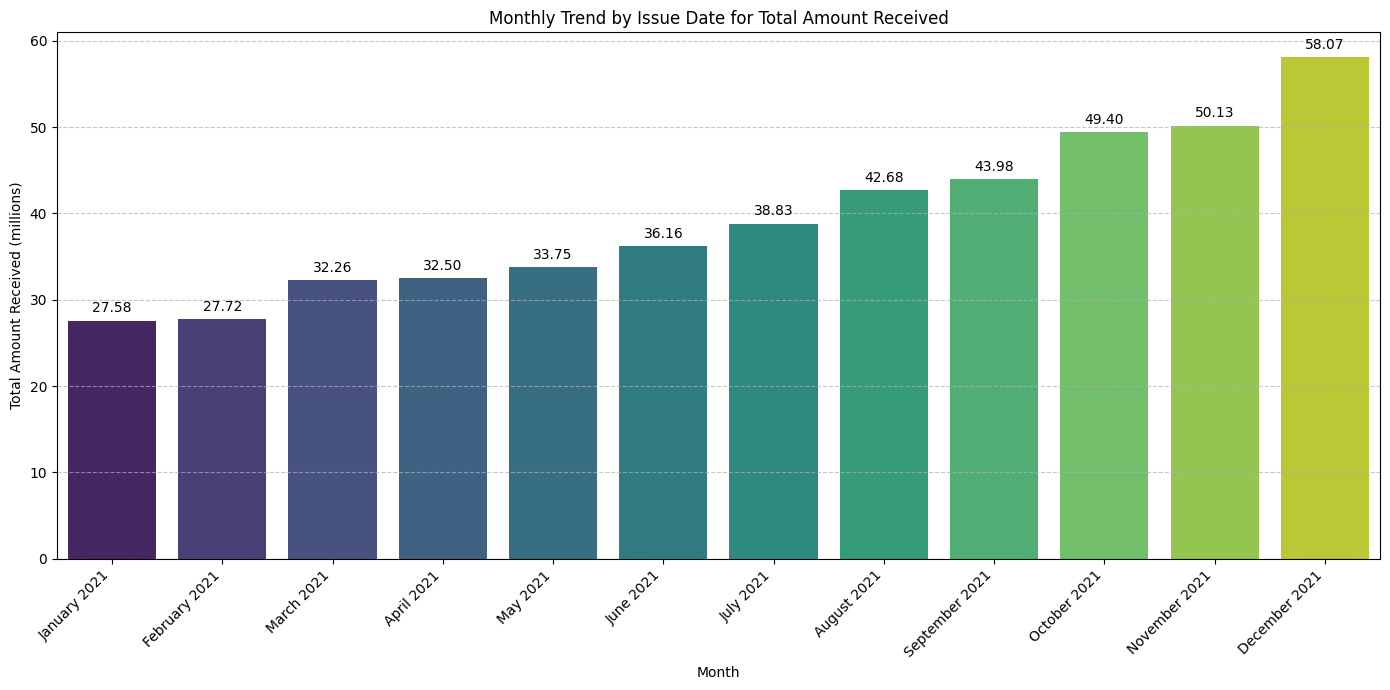

In [31]:
import calendar

monthly_received = (
    data.sort_values('issue_date')
    .assign(monthly_name=lambda x: x['issue_date'].dt.strftime('%B %Y'))
    .groupby('monthly_name')['total_payment']
    .sum()
    .div(1000000) # Convert to millions
    .reset_index(name='total_amount_received_millions')
)

# Extract month number for sorting
monthly_received['month_num'] = monthly_received['monthly_name'].apply(lambda x: list(calendar.month_name).index(x.split(' ')[0]))

# Sort by month number
monthly_received_sorted = monthly_received.sort_values(by=['month_num'])

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='monthly_name', y='total_amount_received_millions', data=monthly_received_sorted, palette='viridis')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xlabel('Month')
plt.ylabel('Total Amount Received (millions)')
plt.title('Monthly Trend by Issue Date for Total Amount Received')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Monthly Trend by Issue Date for Total Loan application

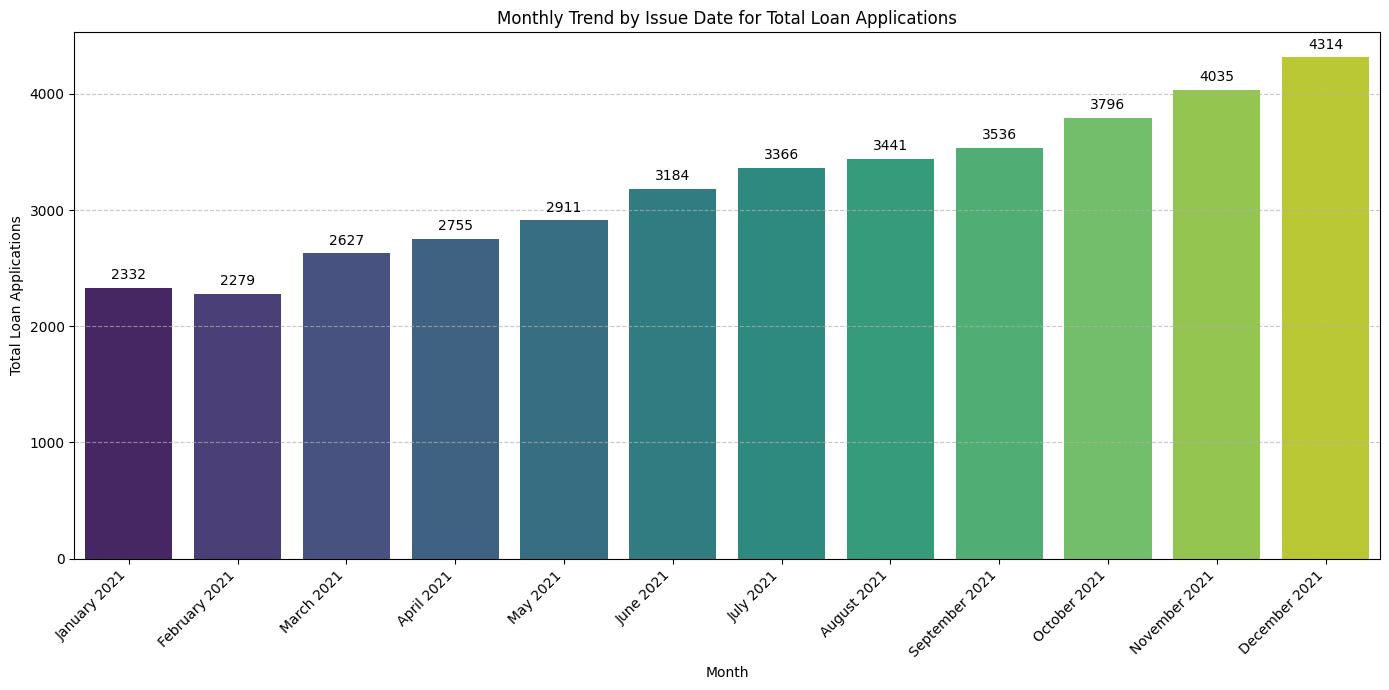

In [32]:
import calendar

monthly_loan_applications = (
    data.sort_values('issue_date')
    .assign(monthly_name=lambda x: x['issue_date'].dt.strftime('%B %Y'))
    .groupby('monthly_name')['id']
    .count() # Count total loan applications
    .reset_index(name='total_loan_applications')
)

# Extract month number for sorting
monthly_loan_applications['month_num'] = monthly_loan_applications['monthly_name'].apply(lambda x: list(calendar.month_name).index(x.split(' ')[0]))

# Sort by month number
monthly_loan_applications_sorted = monthly_loan_applications.sort_values(by=['month_num'])

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='monthly_name', y='total_loan_applications', data=monthly_loan_applications_sorted, palette='viridis')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', # Format as integer for count
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xlabel('Month')
plt.ylabel('Total Loan Applications')
plt.title('Monthly Trend by Issue Date for Total Loan Applications')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Regional Analysis by state for total funded amount

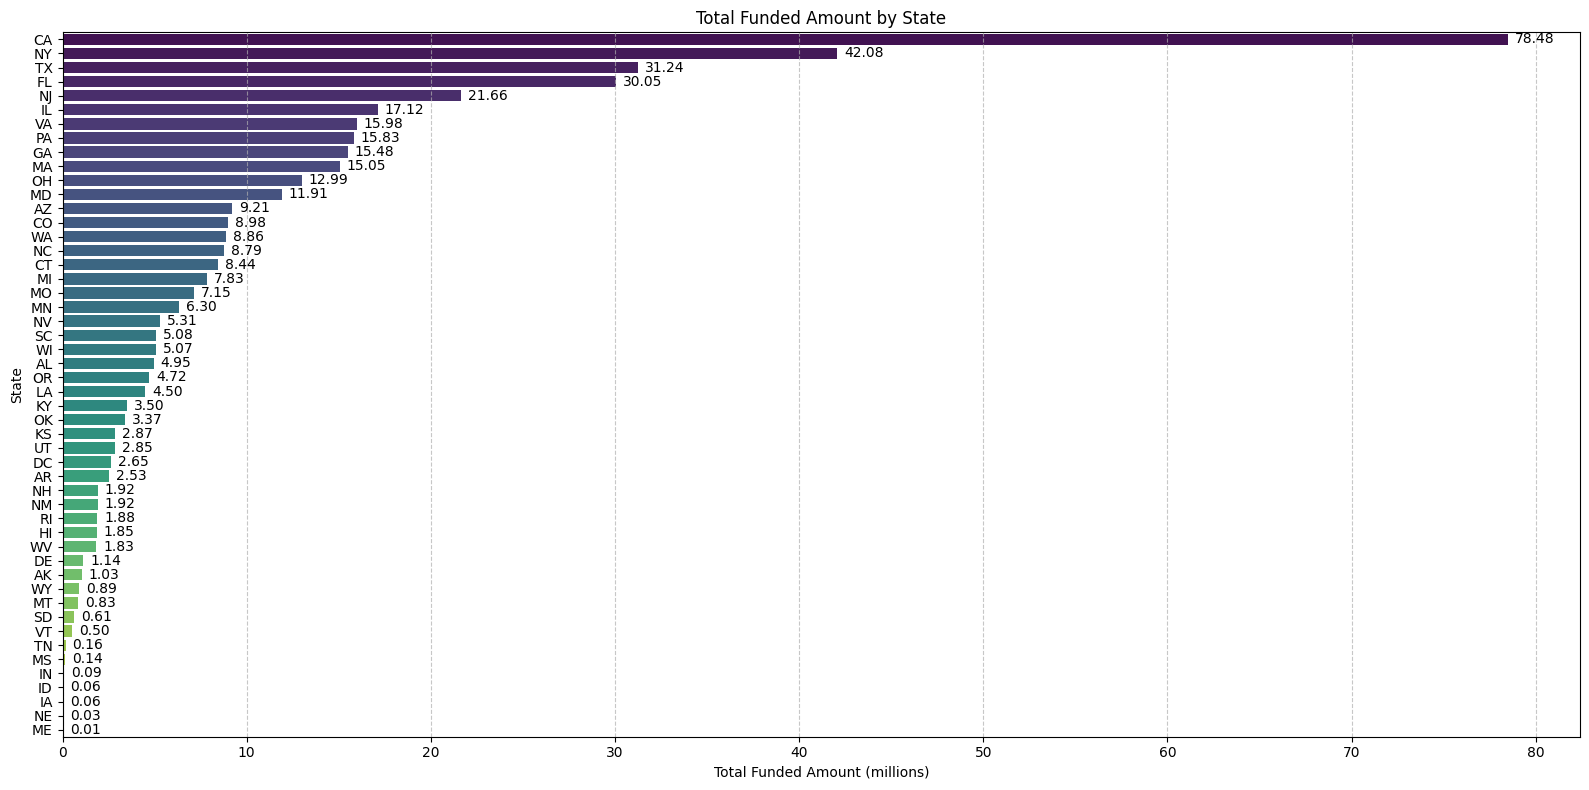

In [37]:
state_funded_amount = (
    data.groupby('address_state')['loan_amount']
    .sum()
    .div(1000000) # Convert to millions
    .reset_index(name='total_funded_amount_millions')
)

# Sort by total funded amount in descending order for better visualization
state_funded_amount_sorted = state_funded_amount.sort_values(by='total_funded_amount_millions', ascending=False)

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='total_funded_amount_millions', y='address_state', data=state_funded_amount_sorted, palette='viridis')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Total Funded Amount (millions)')
plt.ylabel('State')
plt.title('Total Funded Amount by State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()